# Simple Linear Regression

In [3]:
import numpy as np
import scipy.io as sio

In [4]:
data = sio.loadmat("../coursera/machine-learning-ex5/ex5/ex5data1.mat")

In [6]:
_ = [print(val) for val in data.keys() if not val.startswith('__')]

Xtest
yval
X
ytest
y
Xval


In [7]:
X, X_test, X_val = data["X"], data["Xtest"], data["Xval"]
y, y_test, y_val = data['y'], data['ytest'], data['yval']

### Plot training data

In [15]:
sns.lmplot?

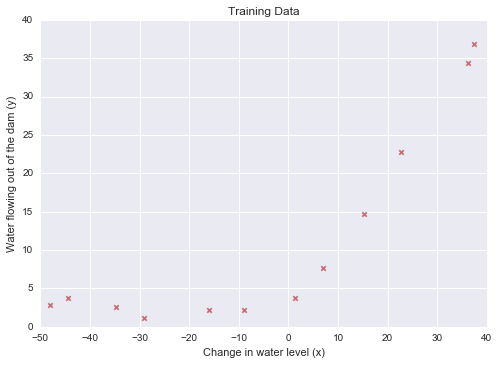

In [46]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
mpl.rcParams["figure.figsize"] = (12,6)

sns.set(color_codes=True)
sns.regplot(X,y, fit_reg=False, marker='x', color='r')
plt.ylim(0, 40)
plt.xlim(-50,40)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Training Data')
plt.show()

    Plot reveals non-linear relationship

### Recall regularized linear regression cost function:

$$ J(\theta) = \frac{1}{2m}\left(\sum_{i=1}^m(h_{\theta}(x^{(i)}) - y^{(i)})^2\right) + \frac{\lambda}{2m}\left(\sum_{j=1}^n\theta^2\right) $$

### Regularized linear regression gradient:

for $j = 0$
$$ 
\frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)} 
$$ 

for $j \geq 1$

$$
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)} + \frac{\lambda}{m}\theta_j
$$

In [120]:
class LinearModel(object):
    '''
    Initializes a LinearModel object that takes as input the 
    data matrix `X`, the outcome vector `y` and optionally 
    the parameter vector `theta`.
    '''
    def __init__(self):
        self.J = [] # list for storing computed costs
        self.optimized_theta = None 
    
    def hypothesis(self, theta, X, y, add_bias = False):
        """
        Computes the hypothesis function for given parameter `theta`.
        """
        if add_bias:
            X = np.insert(X, 0, 1, axis=1) # Add add_bias/intercept 
        if type(theta) == list:
            theta = np.array(theta).reshape(len(theta),1) 
        else:
            theta = theta.reshape(X.shape[1],1)
        m = len(y)

        h = np.dot(X, theta) - y 

        return X, y, theta, h, m 
    
    def cost(self, theta, X, y, regularization=0, add_bias = False):
        '''
        Computes the cost for regularized linear regression 
        given parameter `theta`.
        
        returns: cost `J`
        '''
        X, y, theta, h, m = self.hypothesis(theta, X, y, add_bias)
        
        # compute cost
        J = 1/(2*m) * np.sum(np.square(h))
        
        # Regularization 
        theta_no_bias = theta[1:]         # exclude Bias term

        J += regularization/(2*m) * np.sum(np.square(theta_no_bias))

        return J
    
    def gradient(self, theta, X, y, regularization = 0, add_bias = False):
        """
        Computes Gradient for given parameter `theta`
        """
        X, y, theta, h, m = self.hypothesis(theta, X, y, add_bias)
        grad = 1/m * np.dot(X.transpose(), h)
        
        # Regularization without intercept term
        grad[1:] += regularization/m * theta[1:]

        return grad.flatten()
    
    def train(self, X, y, regularization=0, add_bias=True):
        """
        Trains linear regression given regularization parameter lambda.
        
        Returns Coefficients and plots linear fit
        """
        from scipy.optimize import fmin_cg
        
        if add_bias:
            X = np.insert(X, 0, 1, axis=1) # Add bias/intercept 
            
        x0 = np.zeros((X.shape[1],1))
        self.optimized_theta = fmin_cg(self.cost, x0, args = (X, y, regularization), fprime = self.gradient, maxiter = 200)
        
        self.plot_fit(X, y)
        
        return self.optimized_theta
    
    def learningCurve(self, X, y, Xval, yval, regularization):
        """
        Generates the train and cross validation set errors needed 
        to plot a learning curve.
        
        returns the train and
        cross validation set errors for a learning curve. In particular, 
        it returns two vectors of the same length - error_train and 
        error_val. Then, error_train(i) contains the training error for
        i examples (and similarly for error_val(i)).
        """
        m = X.shape[0]
        error_train = np.zeros((m, 1))
        error_val = np.zeros((m, 1))
        
        theta = self.train(X, y, regularization)
        #error_train, error_val = [(self.cost(train),self.cost(validation)) for \
        #                          train, validation in 
        
    
    def plot_fit(self, X, y, add_bias = False, title="Best Linear Fit", nb = True):
        import matplotlib as mpl
        import matplotlib.pyplot as plt
        import seaborn as sns
        if nb:
            %matplotlib inline
        
        sns.set(color_codes=True)
        if not add_bias:
            X_no_intercept = X[:,1:]
        else:
            # confusing I know
            X_no_intercept = X 
            X = np.insert(X, 0, 1, axis=1) 
            
        theta = self.optimized_theta
        
        sns.regplot(X_no_intercept, y, fit_reg=False, marker='x', color='r')
        plt.plot(X_no_intercept, np.dot(X,theta))
        plt.title("Best Linear Fit")
        plt.ylim(min(y) - 5, max(y) + 2)
        plt.xlim(min(X_no_intercept) - 2,max(X_no_intercept) + 2)
        plt.xlabel("Change in water level (x)")
        plt.ylabel('Water flowing out of the dam (y)')

        plt.show()
        
    def plot_data(self, X, y, title="Training Data", nb = True):
        import matplotlib as mpl
        import matplotlib.pyplot as plt
        import seaborn as sns
        if nb:
            %matplotlib inline
        mpl.rcParams["figure.figsize"] = (12,6)

        sns.set(color_codes=True)
        sns.regplot(X,y, fit_reg=False, marker='x', color='r')
        plt.ylim(min(y) - 2, max(y) + 2)
        plt.xlim(min(X) - 2,max(X) + 2)
        plt.xlabel('Change in water level (x)')
        plt.ylabel('Water flowing out of the dam (y)')
        plt.title(title)
        
        plt.show()

#### Initialize Model

In [121]:
lin_mod = LinearModel()

#### COmpute Cost for given parameters

In [113]:
lin_mod.cost([1,1], X, y, regularization=1, add_bias=True)

303.99319222026429

#### Compute Gradient for given parameters

In [114]:
lin_mod.gradient([1,1], X, y, regularization=1, add_bias=True)

array([ -15.30301567,  598.25074417])

#### Train Model for given regularization parameter (here lambda = 0)

Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5


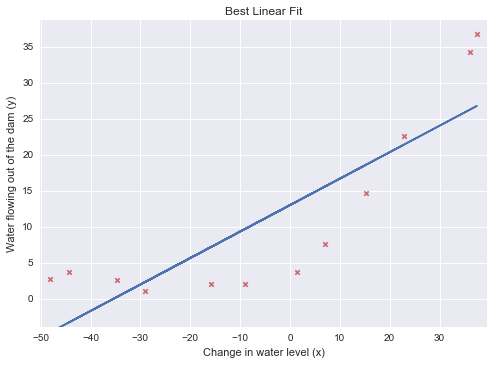

array([ 13.08790351,   0.36777923])

In [122]:
coeff = lin_mod.train(X, y)
coeff

#### Plot Data Method

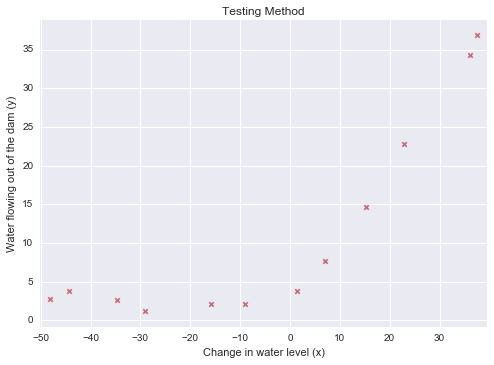

In [123]:
lin_mod.plot_data(X,y, title='Testing Method')

#### Plot fit method

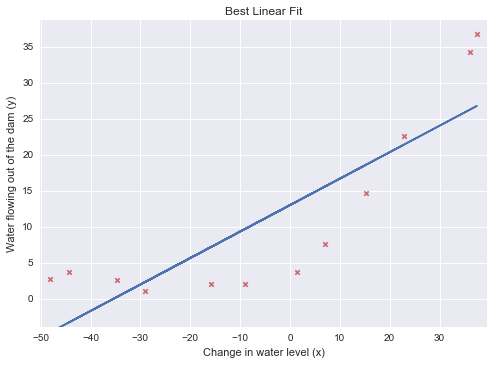

In [125]:
lin_mod.plot_fit(X, y, add_bias=True)

# Bias-variance

## Learning Curves

In [85]:
np.asarray([1,2,3]).reshape(3,1)

array([[1],
       [2],
       [3]])